# Lab 2

In [24]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

Matplotlib is building the font cache; this may take a moment.


### Part 1:

In [25]:
warnings.filterwarnings("ignore", category=FutureWarning)

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)

df = pd.read_csv('processed_dulieuxettuyendaihoc.csv')
sorted_DH1 = df.sort_values(by='DH1')

print("Dữ liệu sắp xếp theo DH1 (tăng dần):")
print(sorted_DH1[['STT', 'DH1']].head(10))

sorted_DH2 = df.sort_values(by=['GT', 'DH2'])

print("\nDữ liệu sắp xếp theo GT và DH2 (tăng dần):")
print(sorted_DH2[['STT', 'GT', 'DH2']].head(10))

agg_funcs = [
    len, 
    np.sum, 
    np.mean, 
    np.median, 
    np.min, 
    np.max, 
    np.std,
    lambda x: x.quantile(0.25),
    lambda x: x.quantile(0.5),
    lambda x: x.quantile(0.75)
]
agg_names = ['count', 'sum', 'mean', 'median', 'min', 'max', 'std', 'Q1', 'Q2', 'Q3']

pivot_KT = pd.pivot_table(df, index='KT', values='DH1', aggfunc=agg_funcs)
pivot_KT.columns = agg_names

print("\nPivot table cho DH1 theo KT:")
print(pivot_KT)
pivot_KT_KV = pd.pivot_table(df, index=['KT', 'KV'], values='DH1', aggfunc=agg_funcs)
pivot_KT_KV.columns = agg_names

print("\nPivot table cho DH1 theo KT và KV:")
print(pivot_KT_KV)

pivot_KT_KV_DT = pd.pivot_table(df, index=['KT', 'KV', 'DT'], values='DH1', aggfunc=agg_funcs)
pivot_KT_KV_DT.columns = agg_names

print("\nPivot table cho DH1 theo KT, KV và DT:")
print(pivot_KT_KV_DT)


Dữ liệu sắp xếp theo DH1 (tăng dần):
    STT   DH1
53   54  1.00
43   44  1.25
72   73  1.50
5     6  1.50
87   88  1.75
83   84  1.75
79   80  2.00
73   74  2.00
57   58  2.00
12   13  2.00

Dữ liệu sắp xếp theo GT và DH2 (tăng dần):
    STT GT   DH2
95   96  F  1.50
25   26  F  2.00
24   25  F  2.25
46   47  F  2.25
13   14  F  2.75
21   22  F  3.00
0     1  F  3.25
51   52  F  3.25
8     9  F  3.50
22   23  F  3.50

Pivot table cho DH1 theo KT:
    count     sum      mean  median   min   max       std      Q1    Q2     Q3
KT                                                                            
A      49  163.50  3.336735    3.25  1.00  6.50  1.274296  2.2500  3.25  4.250
A1      6   17.50  2.916667    3.00  2.00  4.25  0.861201  2.1875  3.00  3.250
B       9   29.50  3.277778    3.50  1.75  4.50  0.823905  3.2500  3.50  3.750
C      14   79.25  5.660714    5.25  4.75  7.00  0.812209  5.0625  5.25  6.375
D1     22   84.25  3.829545    3.75  1.25  6.75  1.370146  3.0000  3.75  4

### Part 2:

In [26]:
if set(['T1','L1','H1','S1','V1','X1','D1','N1']).issubset(df.columns):
    df['TBM1'] = (df['T1']*2 + df['L1'] + df['H1'] + df['S1'] + df['V1']*2 + df['X1'] + df['D1'] + df['N1']) / 10
if set(['T2','L2','H2','S2','V2','X2','D2','N2']).issubset(df.columns):
    df['TBM2'] = (df['T2']*2 + df['L2'] + df['H2'] + df['S2'] + df['V2']*2 + df['X2'] + df['D2'] + df['N2']) / 10
if set(['T6','L6','H6','S6','V6','X6','D6','N6']).issubset(df.columns):
    df['TBM3'] = (df['T6']*2 + df['L6'] + df['H6'] + df['S6'] + df['V6']*2 + df['X6'] + df['D6'] + df['N6']) / 10

if 'TBM1' in df.columns:
    df['US_TBM1'] = (df['TBM1'] / 10) * 4
if 'TBM2' in df.columns:
    df['US_TBM2'] = (df['TBM2'] / 10) * 4
if 'TBM3' in df.columns:
    df['US_TBM3'] = (df['TBM3'] / 10) * 4

print(df[['US_TBM1', 'US_TBM2', 'US_TBM3']].describe())

gt_counts = df['GT'].value_counts()
gt_percentages = df['GT'].value_counts(normalize=True) * 100

print("Bảng tần số của GT:")
print(gt_counts)
print("\nBảng tần suất (%) của GT:")
print(gt_percentages)

plt.figure(figsize=(8,6))


          US_TBM1     US_TBM2    US_TBM3
count  100.000000  100.000000  100.00000
mean     2.434480    2.559600    2.67176
std      0.391203    0.377656    0.29981
min      1.616000    1.768000    1.91600
25%      2.107000    2.223000    2.47300
50%      2.480000    2.588000    2.70600
75%      2.724000    2.893000    2.87400
max      3.232000    3.416000    3.31600
Bảng tần số của GT:
GT
M    52
F    48
Name: count, dtype: int64

Bảng tần suất (%) của GT:
GT
M    52.0
F    48.0
Name: proportion, dtype: float64


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

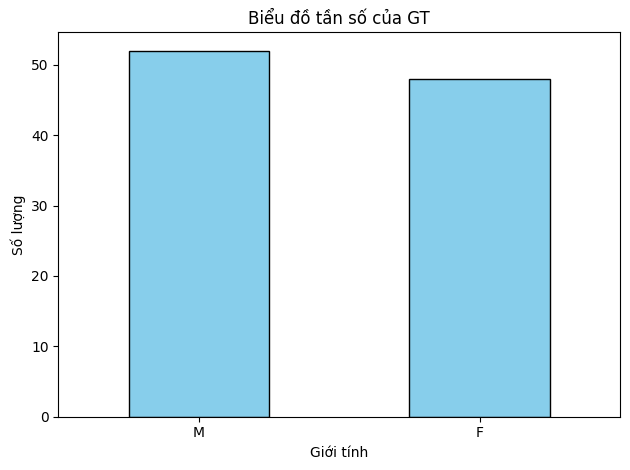

<Figure size 800x800 with 0 Axes>

<Figure size 800x800 with 0 Axes>

In [27]:

gt_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("Biểu đồ tần số của GT")
plt.xlabel("Giới tính")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
plt.figure(figsize=(8,8))


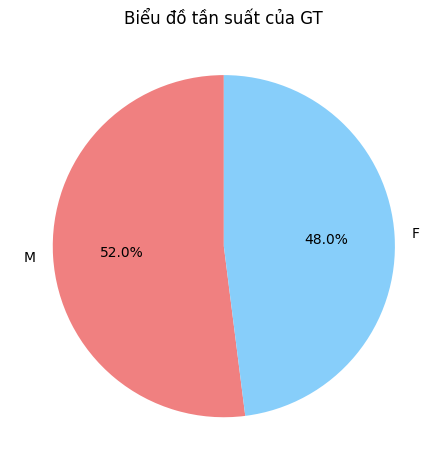

In [28]:

gt_percentages.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title("Biểu đồ tần suất của GT")
plt.ylabel("")
plt.tight_layout()
plt.show()


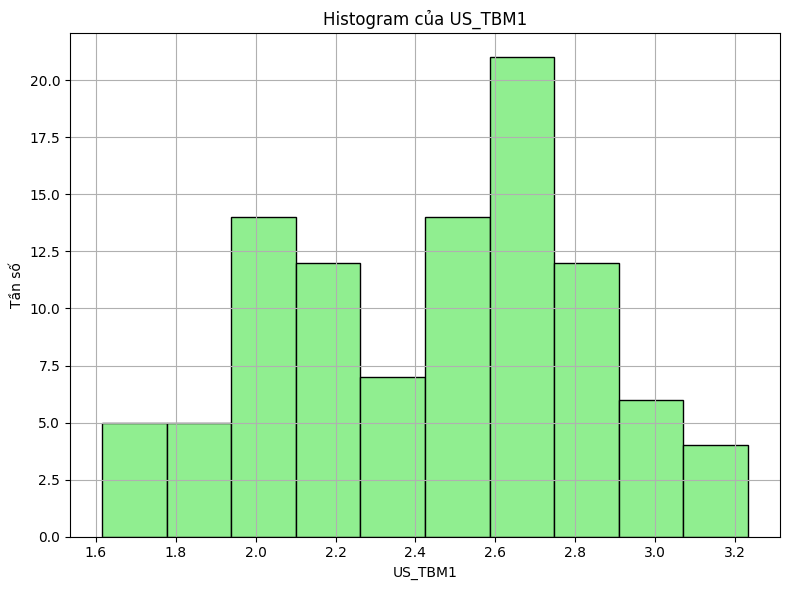

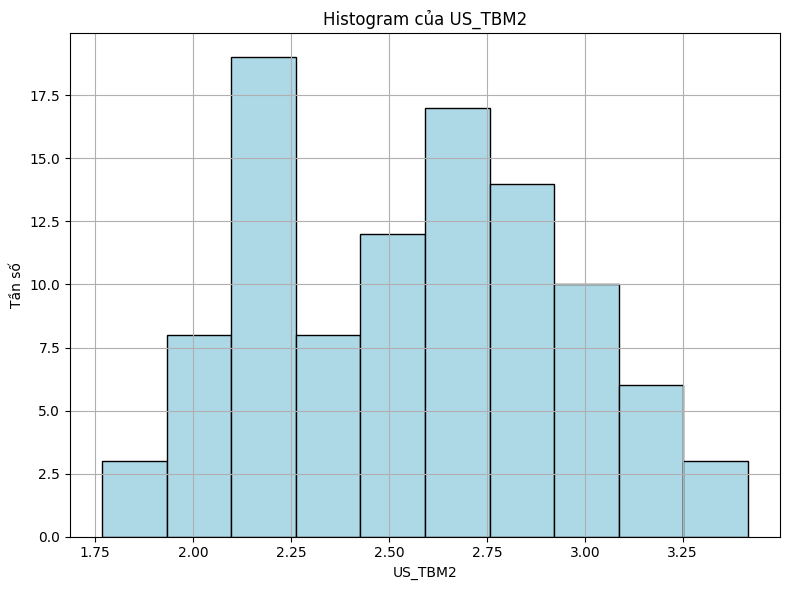

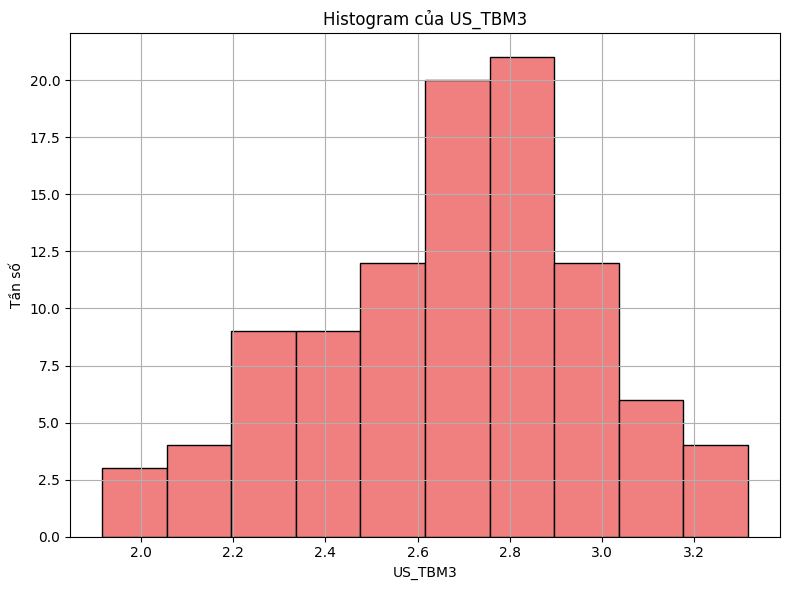

In [29]:

for col, color in zip(['US_TBM1', 'US_TBM2', 'US_TBM3'], ['lightgreen', 'lightblue', 'lightcoral']):
    plt.figure(figsize=(8,6))
    df[col].hist(bins=10, color=color, edgecolor='black')
    plt.title(f"Histogram của {col}")
    plt.xlabel(col)
    plt.ylabel("Tần số")
    plt.tight_layout()
    plt.show()


Bảng tần số của DT đối với học sinh nam:
DT
0.0    50
1.0     1
6.0     1
Name: count, dtype: int64


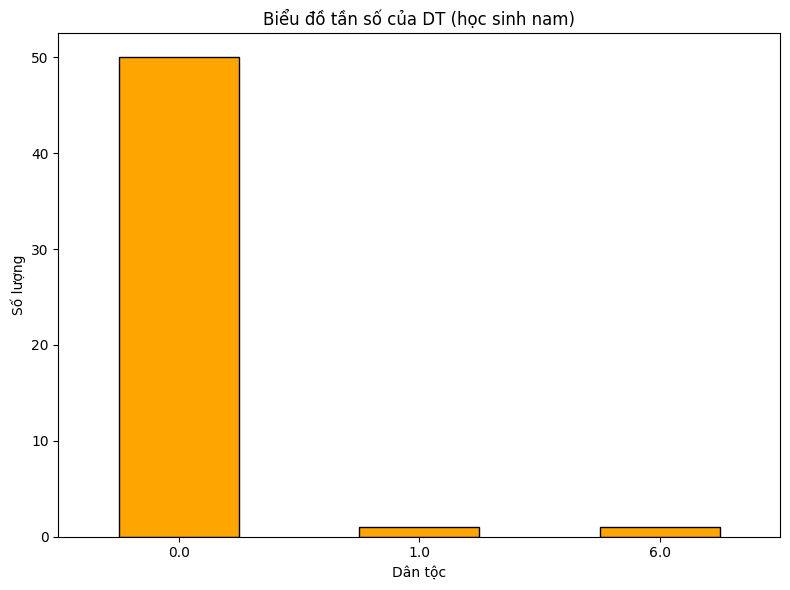

In [30]:

df_male = df[df['GT'] == 'M']
dt_counts_male = df_male['DT'].value_counts()
print("Bảng tần số của DT đối với học sinh nam:")
print(dt_counts_male)

plt.figure(figsize=(8,6))

dt_counts_male.plot(kind='bar', color='orange', edgecolor='black')
plt.title("Biểu đồ tần số của DT (học sinh nam)")
plt.xlabel("Dân tộc")
plt.ylabel("Số lượng")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [31]:

df_filtered = df[
    (df['GT'] == 'M') &
    (df['DT'] == 1.0) &
    (df['DH1'] >= 5.0) &
    (df['DH2'] >= 4.0) &
    (df['DH3'] >= 4.0)
]
kv_counts = df_filtered['KV'].value_counts()
print("Bảng tần số của KV:")
print(kv_counts)

if not kv_counts.empty:
    plt.figure(figsize=(8,6))
    kv_counts.plot(kind='bar', color='purple', edgecolor='black')
    plt.title("Biểu đồ tần số của KV (học sinh nam, dân tộc Kinh, điều kiện điểm)")
    plt.xlabel("KV")
    plt.ylabel("Số lượng")
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()
else:
    print("Không có dữ liệu để vẽ biểu đồ cho KV với điều kiện đã cho.")


Bảng tần số của KV:
Series([], Name: count, dtype: int64)
Không có dữ liệu để vẽ biểu đồ cho KV với điều kiện đã cho.


Thống kê mô tả cho DH1, DH2, DH3:
        DH1   DH2  DH3
count  1.00  1.00  1.0
mean   6.75  5.25  5.0
std     NaN   NaN  NaN
min    6.75  5.25  5.0
25%    6.75  5.25  5.0
50%    6.75  5.25  5.0
75%    6.75  5.25  5.0
max    6.75  5.25  5.0


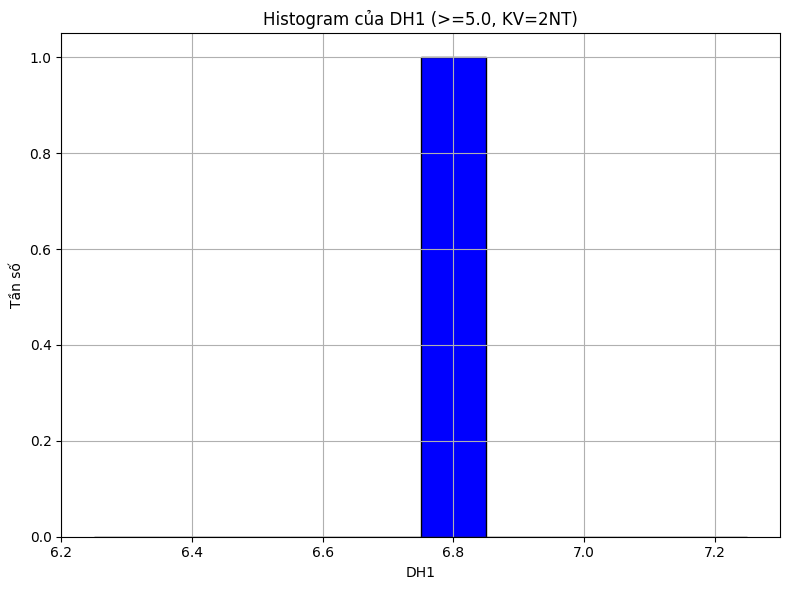

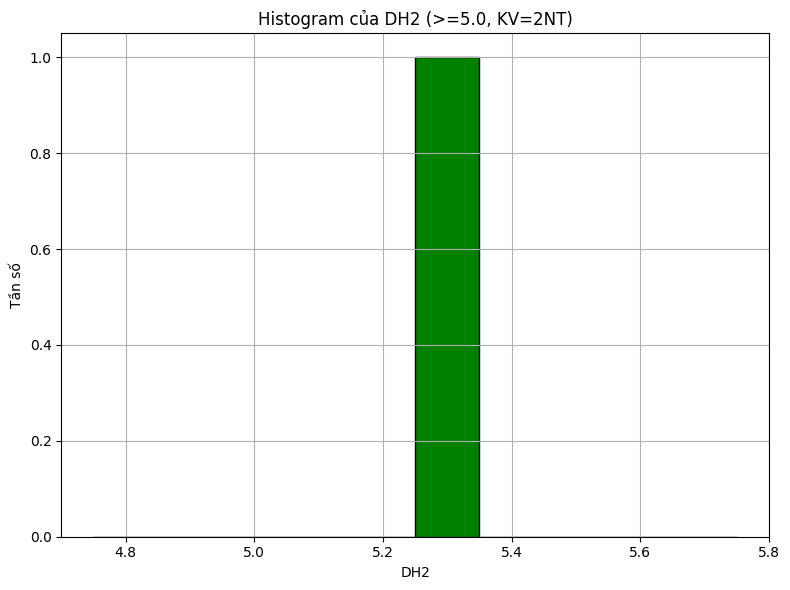

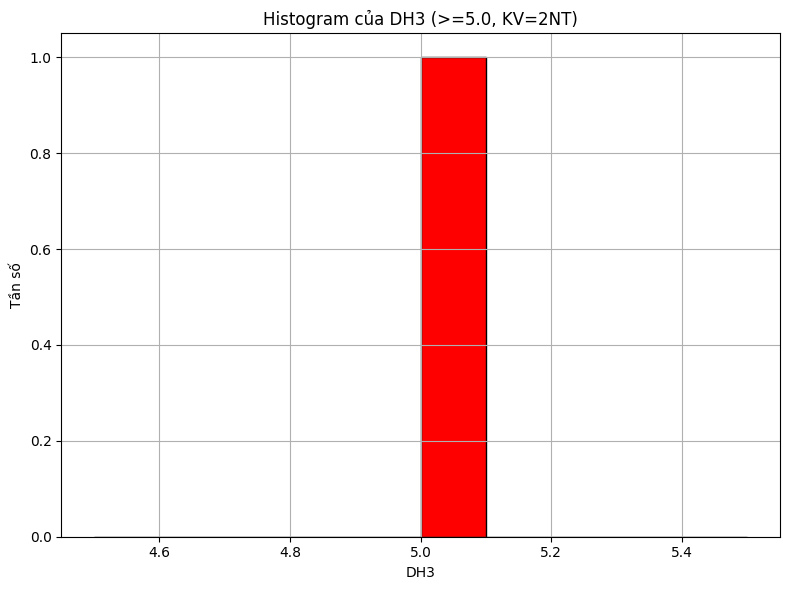

In [32]:

df_filtered2 = df[
    (df['DH1'] >= 5.0) &
    (df['DH2'] >= 5.0) &
    (df['DH3'] >= 5.0) &
    (df['KV'] == '2NT')
]

print("Thống kê mô tả cho DH1, DH2, DH3:")
print(df_filtered2[['DH1', 'DH2', 'DH3']].describe())

for col, color in zip(['DH1', 'DH2', 'DH3'], ['blue', 'green', 'red']):
    plt.figure(figsize=(8,6))
    df_filtered2[col].hist(bins=10, color=color, edgecolor='black')
    plt.title(f"Histogram của {col} (>=5.0, KV=2NT)")
    plt.xlabel(col)
    plt.ylabel("Tần số")
    plt.tight_layout()
    plt.show()


### Part 3:

In [33]:
print(df.columns)


Index(['STT', 'T1', 'L1', 'H1', 'S1', 'V1', 'X1', 'D1', 'N1', 'T2', 'L2', 'H2',
       'S2', 'V2', 'X2', 'D2', 'N2', 'T3', 'L3', 'H3', 'S3', 'V3', 'X3', 'D3',
       'N3', 'T4', 'L4', 'H4', 'S4', 'V4', 'X4', 'D4', 'N4', 'T5', 'L5', 'H5',
       'S5', 'V5', 'X5', 'D5', 'N5', 'T6', 'L6', 'H6', 'S6', 'V6', 'X6', 'D6',
       'N6', 'GT', 'DT', 'KV', 'DH1', 'DH2', 'DH3', 'KT', 'TBM1', 'TBM2',
       'TBM3', 'XL1', 'XL2', 'XL3', 'US_TBM1', 'US_TBM2', 'US_TBM3', 'KQXT'],
      dtype='object')


In [34]:


if set(['T1','L1','H1','S1','V1','X1','D1','N1']).issubset(df.columns):
    df['TBM1'] = (df['T1']*2 + df['L1'] + df['H1'] + df['S1'] + df['V1']*2 + df['X1'] + df['D1'] + df['N1']) / 10
if set(['T2','L2','H2','S2','V2','X2','D2','N2']).issubset(df.columns):
    df['TBM2'] = (df['T2']*2 + df['L2'] + df['H2'] + df['S2'] + df['V2']*2 + df['X2'] + df['D2'] + df['N2']) / 10
if set(['T6','L6','H6','S6','V6','X6','D6','N6']).issubset(df.columns):
    df['TBM3'] = (df['T6']*2 + df['L6'] + df['H6'] + df['S6'] + df['V6']*2 + df['X6'] + df['D6'] + df['N6']) / 10

def classify_grade(score):
    if score < 5.0:
        return 'Y'
    elif score < 6.5:
        return 'TB'
    elif score < 8.0:
        return 'K'
    elif score < 9.0:
        return 'G'
    else:
        return 'XS'

if 'TBM1' in df.columns:
    df['XL1'] = df['TBM1'].apply(classify_grade)
if 'TBM2' in df.columns:
    df['XL2'] = df['TBM2'].apply(classify_grade)
if 'TBM3' in df.columns:
    df['XL3'] = df['TBM3'].apply(classify_grade)

print("Các cột hiện có trong DataFrame:")
print(df.columns)


df_female = df[df['GT'] == 'F']
xl_categories = ['Y', 'TB', 'K', 'G', 'XS']

xl1_counts = df_female['XL1'].value_counts().reindex(xl_categories, fill_value=0)
xl2_counts = df_female['XL2'].value_counts().reindex(xl_categories, fill_value=0)
xl3_counts = df_female['XL3'].value_counts().reindex(xl_categories, fill_value=0)

xl_df = pd.DataFrame({'XL1': xl1_counts, 'XL2': xl2_counts, 'XL3': xl3_counts})
print("Bảng số lượng học sinh nữ theo xếp loại (XL1, XL2, XL3):")
print(xl_df)

Các cột hiện có trong DataFrame:
Index(['STT', 'T1', 'L1', 'H1', 'S1', 'V1', 'X1', 'D1', 'N1', 'T2', 'L2', 'H2',
       'S2', 'V2', 'X2', 'D2', 'N2', 'T3', 'L3', 'H3', 'S3', 'V3', 'X3', 'D3',
       'N3', 'T4', 'L4', 'H4', 'S4', 'V4', 'X4', 'D4', 'N4', 'T5', 'L5', 'H5',
       'S5', 'V5', 'X5', 'D5', 'N5', 'T6', 'L6', 'H6', 'S6', 'V6', 'X6', 'D6',
       'N6', 'GT', 'DT', 'KV', 'DH1', 'DH2', 'DH3', 'KT', 'TBM1', 'TBM2',
       'TBM3', 'XL1', 'XL2', 'XL3', 'US_TBM1', 'US_TBM2', 'US_TBM3', 'KQXT'],
      dtype='object')
Bảng số lượng học sinh nữ theo xếp loại (XL1, XL2, XL3):
    XL1  XL2  XL3
Y     5    1    0
TB   18   15   12
K    24   30   35
G     1    2    1
XS    0    0    0


<Figure size 1000x600 with 0 Axes>

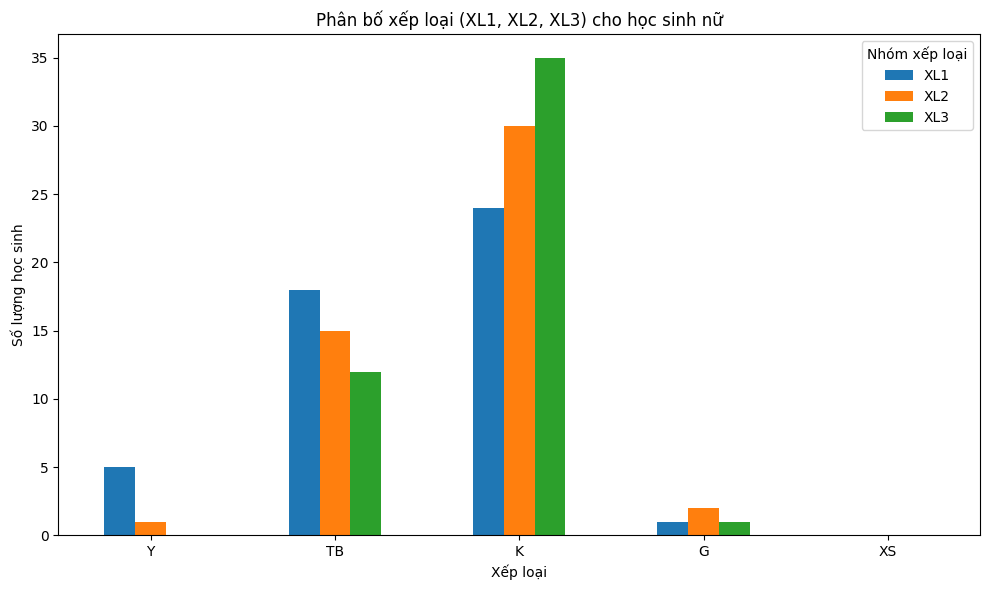

In [35]:

plt.figure(figsize=(10,6))
xl_df.plot(kind='bar', figsize=(10,6))
plt.title("Phân bố xếp loại (XL1, XL2, XL3) cho học sinh nữ")
plt.xlabel("Xếp loại")
plt.ylabel("Số lượng học sinh")
plt.xticks(rotation=0)
plt.legend(title="Nhóm xếp loại")
plt.tight_layout()
plt.show()

In [47]:
df

,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,KQXT,phanlopT1
0,1,7.2,7.3,6.3,7.3,7.0,7.9,7.3,5.5,8.4,8.9,5.8,9.0,6.6,8.7,7.2,5.8,7.4,7.4,5.2,6.6,6.9,8.9,8.1,5.8,7.2,7.1,5.9,7.2,6.6,5.8,8.1,5.9,7.4,5.6,6.1,5.7,7.9,5.0,7.4,5.0,6.9,5.7,6.5,7.2,8.4,6.6,7.6,5.9,F,0.0,2NT,3.25,3.25,4.50,A1,7.00,7.54,7.01,K,K,K,2.800,3.016,2.804,0,Khá
1,2,5.4,3.9,3.9,4.0,5.4,5.4,5.3,2.8,6.3,5.4,3.2,7.2,5.4,6.1,4.7,4.7,4.3,3.8,3.7,3.7,5.2,6.6,5.8,4.4,4.9,2.8,5.1,4.5,5.6,7.0,7.6,4.7,3.0,4.6,4.4,4.9,4.3,6.3,6.7,4.4,4.0,5.4,4.0,5.2,5.5,6.6,6.1,4.4,M,0.0,1,6.00,4.00,3.50,C,4.69,5.47,5.07,Y,TB,TB,1.876,2.188,2.028,0,Trung bình
2,3,5.6,6.8,7.2,7.5,4.3,7.4,5.8,3.2,5.0,4.9,6.2,6.1,5.3,7.1,4.0,4.9,2.8,6.3,6.2,5.6,2.5,5.8,5.1,3.7,6.1,6.1,5.8,6.8,4.0,6.4,5.3,4.1,4.8,5.1,6.4,5.1,4.0,6.9,3.9,3.2,5.7,6.6,6.8,6.8,4.1,7.9,8.1,4.6,M,0.0,1,5.00,6.75,4.00,C,5.77,5.38,6.04,TB,TB,TB,2.308,2.152,2.416,1,Trung bình
3,4,6.6,6.4,5.3,6.9,5.4,7.3,6.4,5.8,5.1,6.2,5.5,5.5,4.4,6.5,4.9,4.4,5.9,7.3,5.9,4.9,5.7,6.8,6.8,5.4,4.1,4.4,4.1,7.3,5.3,7.1,7.3,5.6,6.1,4.9,5.3,4.0,6.2,5.5,5.9,6.5,7.4,5.6,6.6,6.8,6.6,7.1,7.3,7.4,M,0.0,1,4.25,4.25,5.25,D1,6.21,5.20,6.88,TB,TB,K,2.484,2.080,2.752,0,Trung bình
4,5,6.0,5.0,6.0,7.3,6.5,7.7,7.9,6.1,5.4,5.5,5.9,7.5,6.5,6.9,7.6,6.4,7.6,7.6,6.7,6.6,5.7,7.9,7.4,7.3,4.4,6.5,5.6,8.3,6.2,4.9,8.6,7.7,6.8,5.4,4.7,5.0,5.1,7.0,7.0,6.3,8.0,6.2,6.8,6.9,6.6,6.1,7.5,7.2,M,0.0,2NT,4.25,4.50,5.00,A,6.50,6.36,6.99,K,TB,K,2.600,2.544,2.796,0,Trung bình
5,6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,0.0,1,1.50,4.00,6.00,D1,7.96,8.54,7.38,K,G,K,3.184,3.416,2.952,0,Giỏi
6,7,2.8,3.9,5.5,6.9,5.0,7.3,4.6,5.2,4.4,6.7,5.5,7.7,5.0,6.6,6.1,4.6,4.6,4.8,4.4,8.1,5.6,6.0,4.8,3.9,4.7,6.3,4.8,7.1,6.8,7.7,6.6,5.6,5.4,4.5,5.0,5.0,5.9,6.1,6.1,4.8,5.3,7.0,6.0,5.7,6.1,6.6,6.0,6.0,F,0.0,2,6.50,6.75,5.25,C,4.90,5.60,6.01,Y,TB,TB,1.960,2.240,2.404,1,Kém
7,8,8.3,6.0,7.6,5.1,7.5,4.7,5.8,7.2,6.7,6.3,6.4,7.1,7.3,6.9,6.1,7.9,8.6,5.7,6.9,6.6,7.4,6.0,5.8,6.5,8.3,5.3,6.2,6.4,7.6,5.4,6.7,6.3,8.5,7.0,6.1,6.4,6.6,4.8,7.4,6.9,8.3,6.7,5.6,5.9,7.3,7.1,6.8,7.0,F,0.0,2,3.75,4.50,4.25,D1,6.80,6.87,7.03,K,K,K,2.720,2.748,2.812,0,Giỏi
8,9,6.5,6.3,7.6,6.0,5.5,7.1,6.3,5.0,7.3,6.8,7.3,6.5,6.4,7.9,7.6,3.7,6.4,6.7,6.7,7.3,6.2,6.1,8.2,5.7,8.1,6.0,6.3,7.8,7.2,7.6,8.5,5.7,7.7,7.5,8.8,6.5,5.6,5.6,7.1,6.7,7.7,8.7,8.9,7.5,6.0,9.1,7.9,6.1,F,0.0,1,3.50,3.50,6.75,D1,6.23,6.72,7.56,TB,K,K,2.492,2.688,3.024,0,Trung bình
9,10,7.3,5.9,4.7,7.1,6.7,7.9,6.7,7.7,8.0,6.8,7.6,6.9,6.8,7.8,6.4,7.4,6.5,7.3,6.0,7.8,7.2,7.9,7.1,7.7,5.5,7.0,6.0,6.7,8.0,7.2,6.3,7.2,7.5,7.0,8.0,5.9,7.1,6.3,5.1,7.1,6.9,7.0,6.7,7.1,7.7,6.4,6.1,7.8,F,0.0,1,4.00,4.75,5.50,D1,6.80,7.25,7.03,K,K,K,2.720,2.900,2.812,0,Khá


<Figure size 1000x600 with 0 Axes>

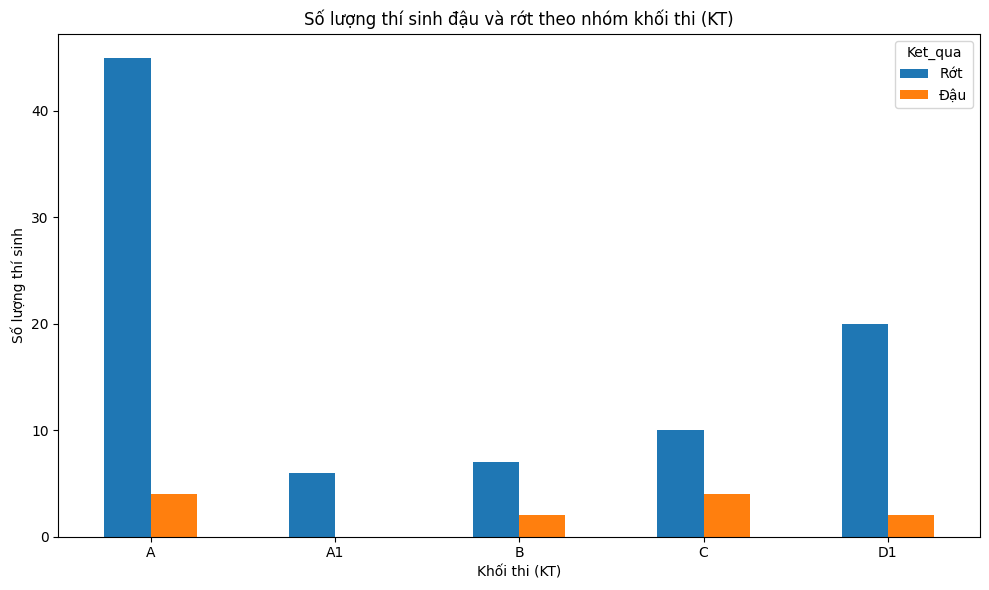

In [48]:

pass_fail_counts = df.groupby(['KT','KQXT']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))

pass_fail_counts.plot(kind='bar', figsize=(10,6))
plt.title("Số lượng thí sinh đậu và rớt theo nhóm khối thi (KT)")
plt.xlabel("Khối thi (KT)")
plt.ylabel("Số lượng thí sinh")
plt.legend(title="Ket_qua", labels=["Rớt", "Đậu"])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

### Part 4:

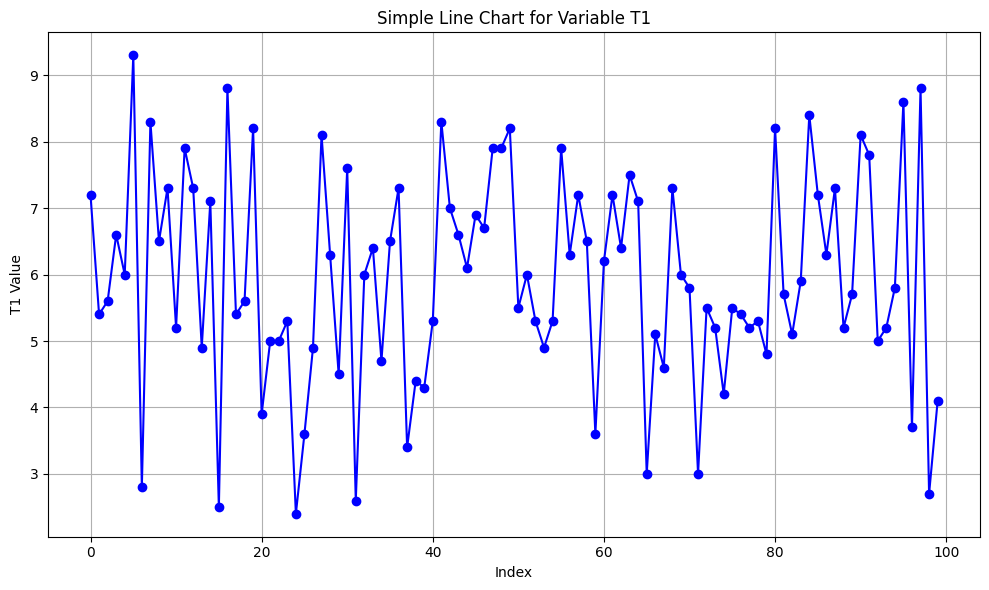

In [49]:
plt.figure(figsize=(10,6))
plt.plot(df['T1'], marker='o', linestyle='-', color='blue')
plt.title("Simple Line Chart for Variable T1")
plt.xlabel("Index")
plt.ylabel("T1 Value")
plt.grid(True)
plt.tight_layout()
plt.show()

In [50]:

conditions = [
    (df['T1'] >= 0) & (df['T1'] < 5),
    (df['T1'] >= 5) & (df['T1'] < 7),
    (df['T1'] >= 7) & (df['T1'] < 8),
    (df['T1'] >= 8)
]
choices = ['kém', 'trung bình', 'khá', 'giỏi']

df['phanlopt1'] = np.select(conditions, choices, default=np.nan)

freq_table = df['phanlopt1'].value_counts().sort_index()
print("Bảng tần số cho biến phanlopt1:")
print(freq_table)

plt.figure(figsize=(10,6))

for label, group in df.groupby('phanlopt1'):

    group_sorted = group.sort_index()
    plt.plot(group_sorted.index, group_sorted['T1'], marker='o', linestyle='-', label=label)

plt.xlabel("Index")
plt.ylabel("Giá trị T1")
plt.title("Biểu đồ đường Multiple Line cho T1 theo phanlopt1")
plt.legend(title="phanlopt1")
plt.grid(True)
plt.tight_layout()
plt.show()


TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyFloatDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyFloatDType'>)

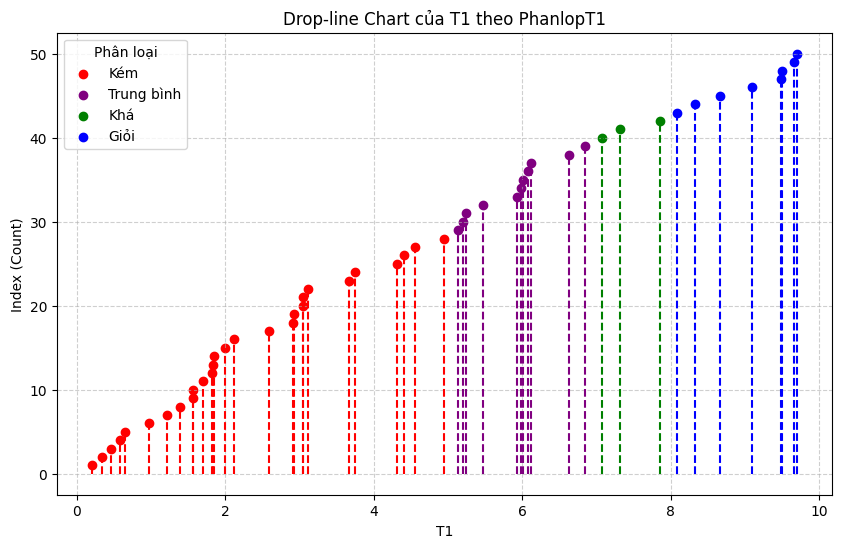

In [51]:

np.random.seed(42)
data = pd.DataFrame({
    'T1': np.random.uniform(0, 10, 50),
})

def classify_t1(score):
    if score < 5:
        return 'Kém'
    elif score < 7:
        return 'Trung bình'
    elif score < 8:
        return 'Khá'
    else:
        return 'Giỏi'

data['phanlopt1'] = data['T1'].apply(classify_t1)
data = data.sort_values(by="T1").reset_index(drop=True)

colors = {'Kém': 'red', 'Trung bình': 'purple', 'Khá': 'green', 'Giỏi': 'blue'}

plt.figure(figsize=(10, 6))
drawn_labels = {}

for i in range(len(data)):
    category = data['phanlopt1'].iloc[i]
    label = category if category not in drawn_labels else ""
    drawn_labels[category] = True
    plt.plot([data['T1'].iloc[i], data['T1'].iloc[i]], [0, i+1],
             color=colors[category], linestyle="--")
    plt.scatter(data['T1'].iloc[i], i+1, color=colors[category], label=label)

plt.xlabel("T1")
plt.ylabel("Index (Count)")
plt.title("Drop-line Chart của T1 theo PhanlopT1")
plt.legend(title="Phân loại")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


### Part 5:

In [52]:

desc_T1 = df['T1'].describe()
skew_T1 = df['T1'].skew()
kurt_T1 = df['T1'].kurtosis()
print("Thống kê mô tả của T1:")
print(desc_T1)
print(f"Skewness (độ lệch): {skew_T1:.3f}")
print(f"Kurtosis (mức độ nhọn): {kurt_T1:.3f}")


Thống kê mô tả của T1:
count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
Name: T1, dtype: float64
Skewness (độ lệch): -0.178
Kurtosis (mức độ nhọn): -0.480


In [53]:

ten_summary = pd.concat([
    df['T1'].describe(),
    df['T1'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])
])
print("\n10 đại lượng mô tả của T1:")
print(ten_summary)


10 đại lượng mô tả của T1:
count    100.000000
mean       5.946000
std        1.608338
min        2.400000
25%        5.000000
50%        5.850000
75%        7.200000
max        9.300000
0.05       2.990000
0.25       5.000000
0.5        5.850000
0.75       7.200000
0.95       8.305000
Name: T1, dtype: float64


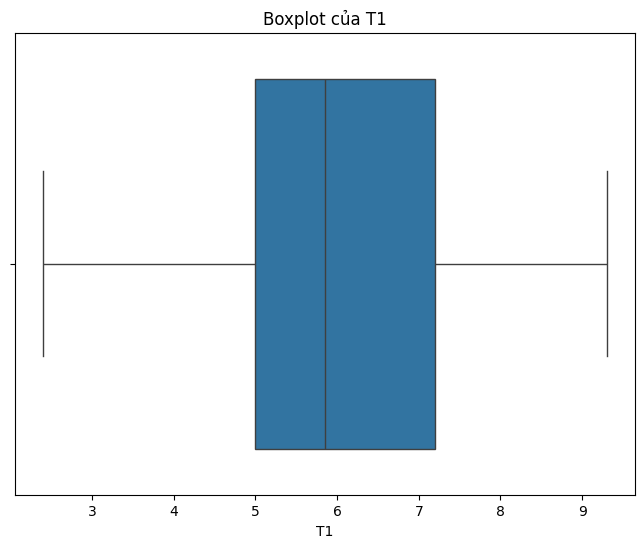

In [54]:

plt.figure(figsize=(8,6))
sns.boxplot(x=df['T1'])
plt.title("Boxplot của T1")
plt.xlabel("T1")
plt.show()


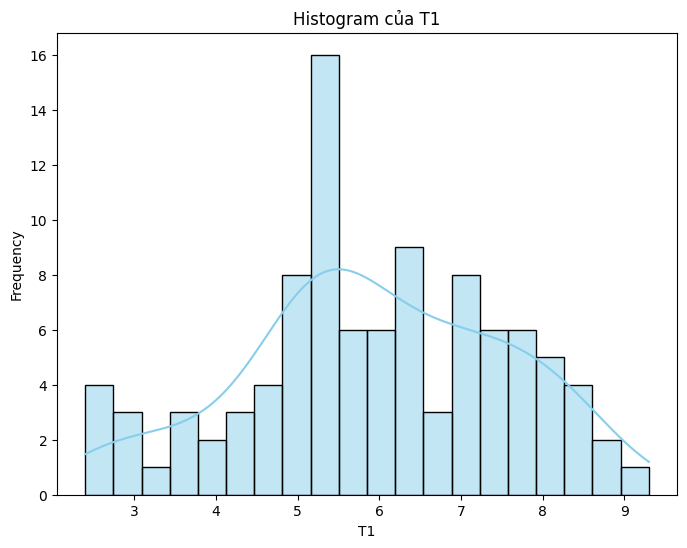

In [55]:

plt.figure(figsize=(8,6))
sns.histplot(df['T1'], kde=True, bins=20, color='skyblue', edgecolor='black')
plt.title("Histogram của T1")
plt.xlabel("T1")
plt.ylabel("Frequency")
plt.show()


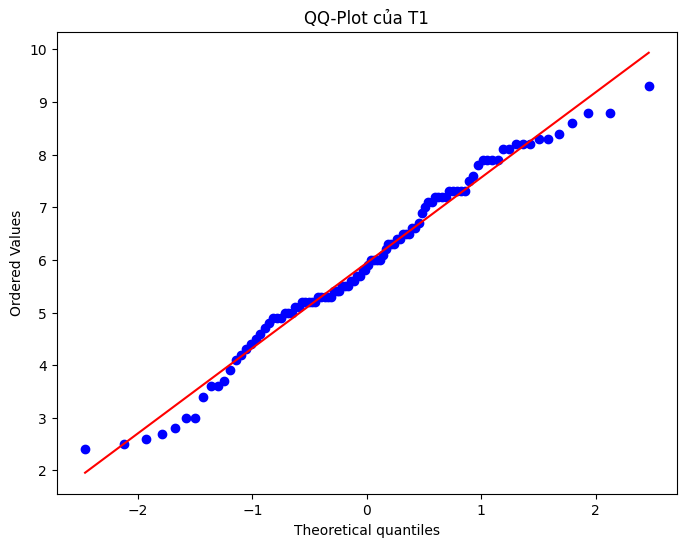

In [56]:
plt.figure(figsize=(8,6))
stats.probplot(df['T1'], dist="norm", plot=plt)
plt.title("QQ-Plot của T1")
plt.show()



Nhóm Giỏi (Count = 12):
count    12.000000
mean      8.441667
std       0.365459
min       8.100000
25%       8.200000
50%       8.300000
75%       8.650000
max       9.300000
Name: T1, dtype: float64


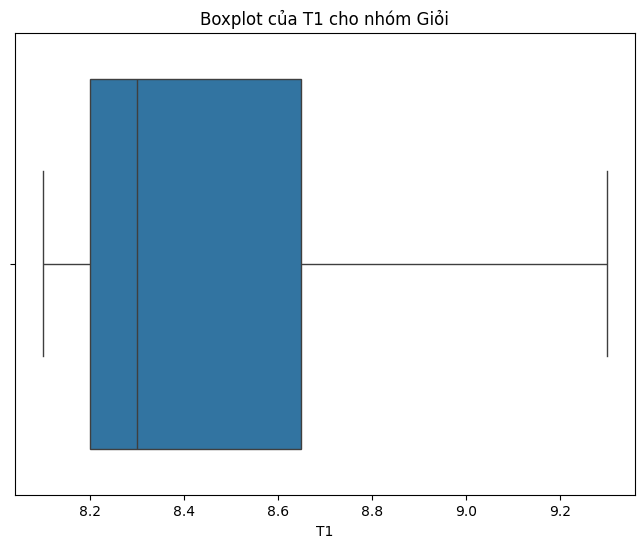

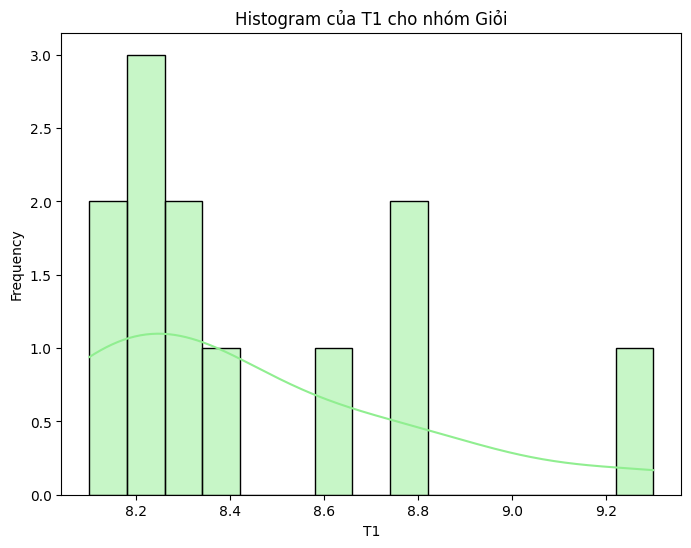

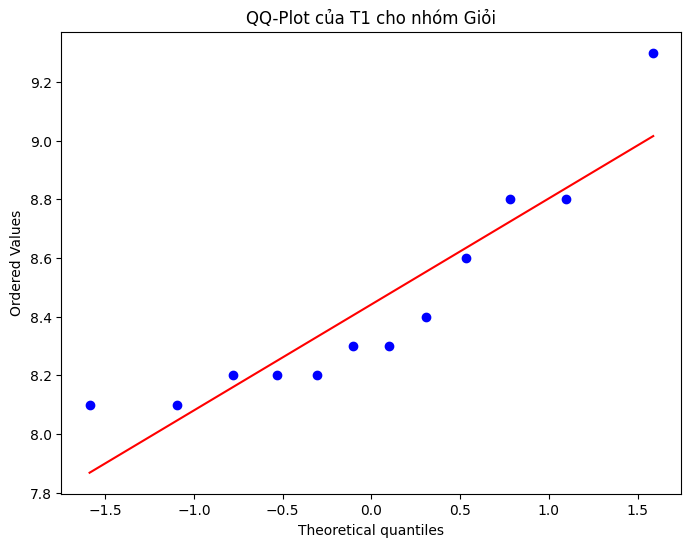


Nhóm Khá (Count = 19):
count    19.000000
mean      7.421053
std       0.311945
min       7.000000
25%       7.200000
50%       7.300000
75%       7.700000
max       7.900000
Name: T1, dtype: float64


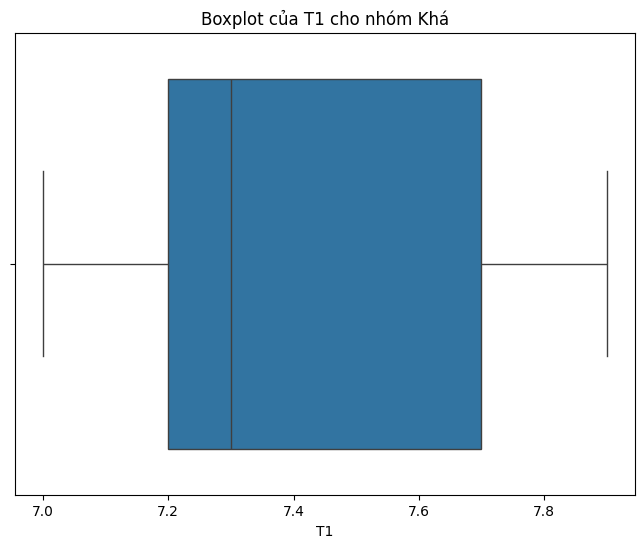

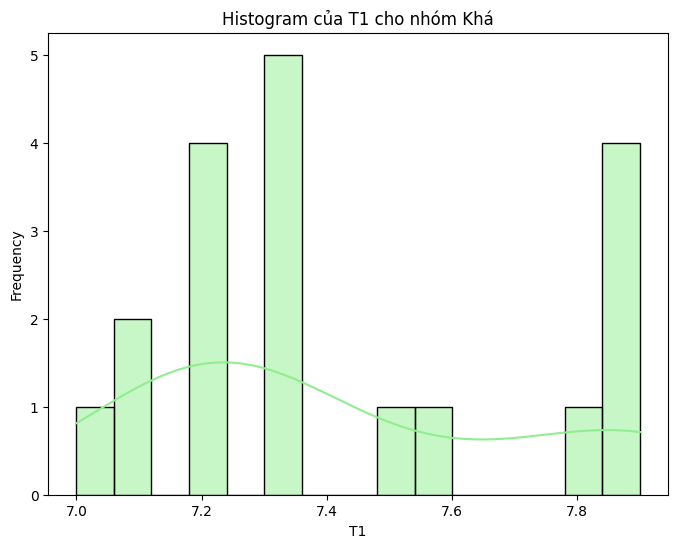

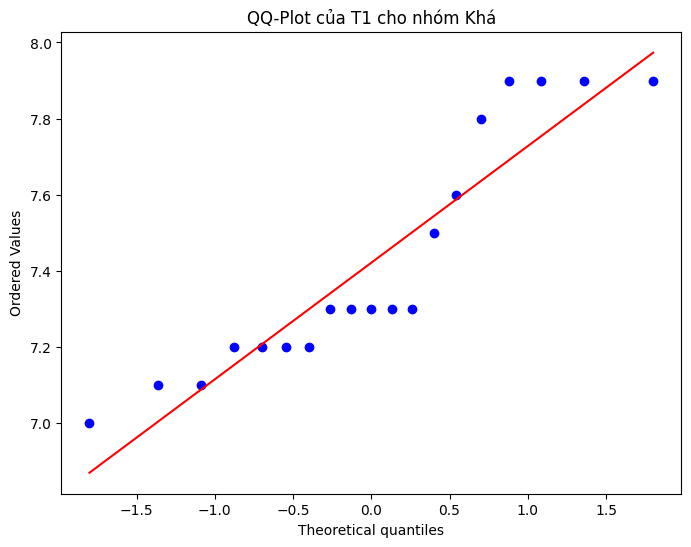


Nhóm Kém (Count = 23):
count    23.000000
mean      3.804348
std       0.859957
min       2.400000
25%       3.000000
50%       3.900000
75%       4.550000
max       4.900000
Name: T1, dtype: float64


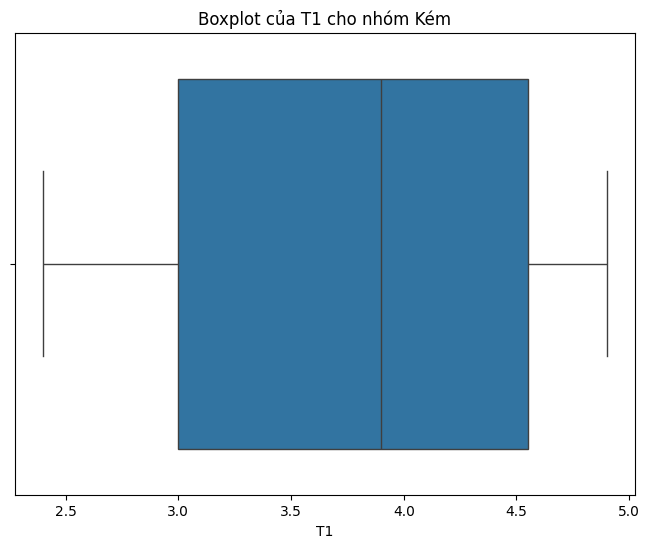

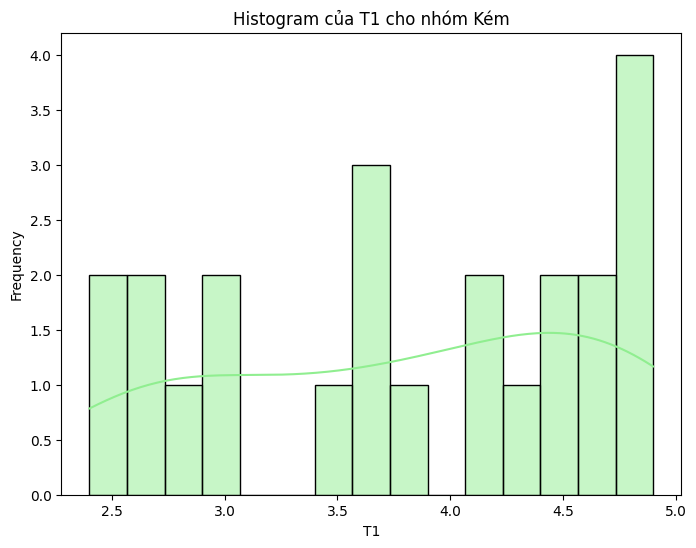

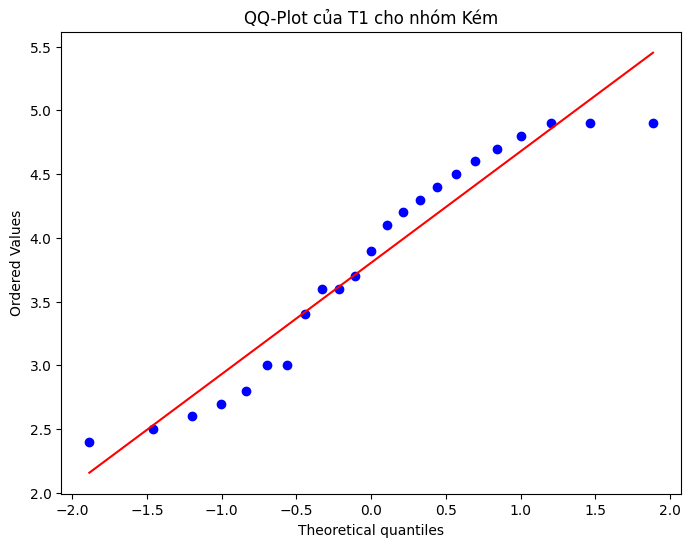


Nhóm Trung bình (Count = 46):
count    46.000000
mean      5.756522
std       0.545141
min       5.000000
25%       5.300000
50%       5.650000
75%       6.275000
max       6.900000
Name: T1, dtype: float64


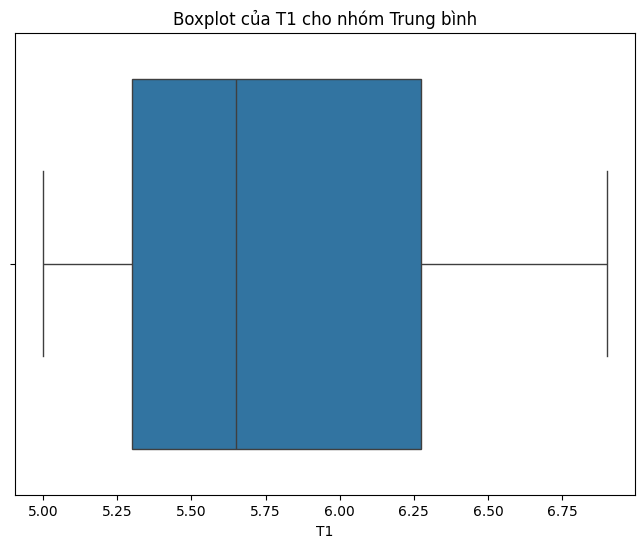

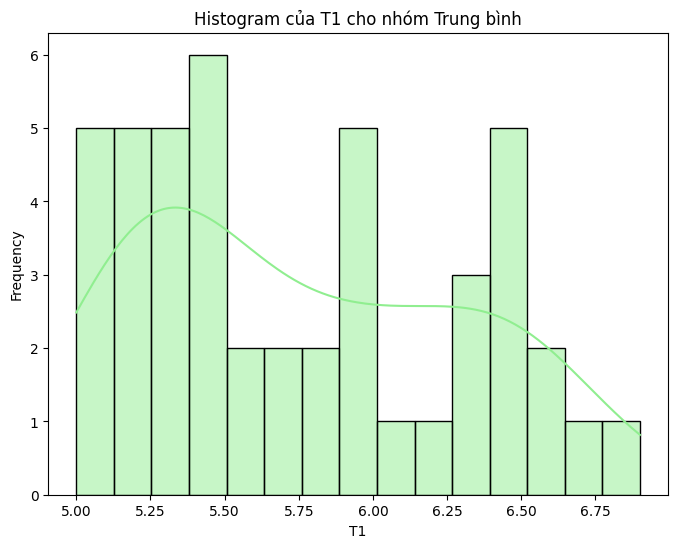

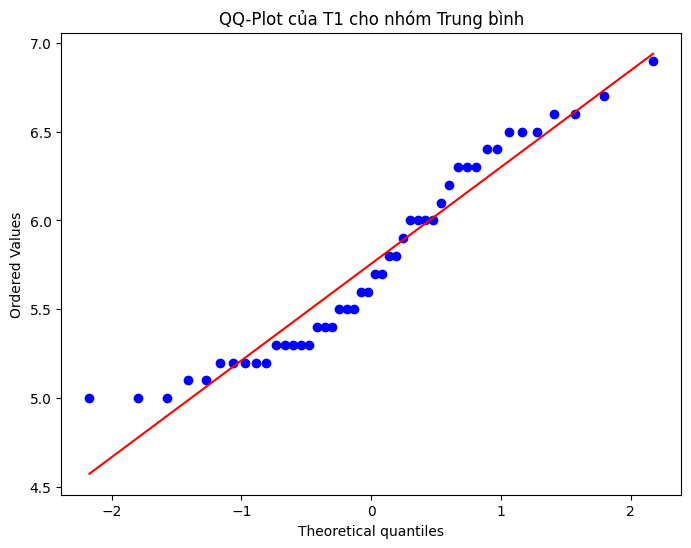

In [57]:

def classify_t1(score):
    if score < 5:
        return 'Kém'
    elif score < 7:
        return 'Trung bình'
    elif score < 8:
        return 'Khá'
    else:
        return 'Giỏi'

if 'phanlopT1' not in df.columns:
    df['phanlopT1'] = df['T1'].apply(classify_t1)

for group in sorted(df['phanlopT1'].unique()):
    subset = df[df['phanlopT1'] == group]
    print(f"\nNhóm {group} (Count = {len(subset)}):")
    print(subset['T1'].describe())
    
    plt.figure(figsize=(8,6))
    sns.boxplot(x=subset['T1'])
    plt.title(f"Boxplot của T1 cho nhóm {group}")
    plt.xlabel("T1")
    plt.show()

    plt.figure(figsize=(8,6))
    sns.histplot(subset['T1'], kde=True, bins=15, color='lightgreen', edgecolor='black')
    plt.title(f"Histogram của T1 cho nhóm {group}")
    plt.xlabel("T1")
    plt.ylabel("Frequency")
    plt.show()
    
    plt.figure(figsize=(8,6))
    stats.probplot(subset['T1'], dist="norm", plot=plt)
    plt.title(f"QQ-Plot của T1 cho nhóm {group}")
    plt.show()


Covariance giữa DH1 và T1: 0.113
Correlation giữa DH1 và T1: 0.049


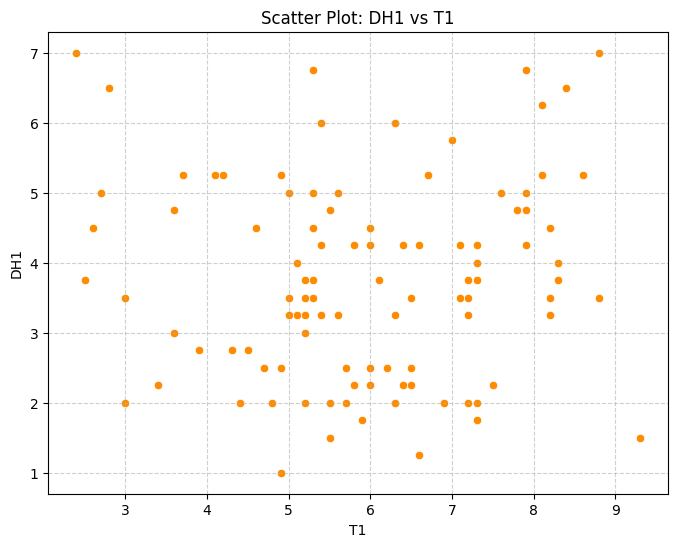

In [58]:
cov_DH1_T1 = df['DH1'].cov(df['T1'])
corr_DH1_T1 = df['DH1'].corr(df['T1'])
print(f"Covariance giữa DH1 và T1: {cov_DH1_T1:.3f}")
print(f"Correlation giữa DH1 và T1: {corr_DH1_T1:.3f}")

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='T1', y='DH1', color='darkorange')
plt.title("Scatter Plot: DH1 vs T1")
plt.xlabel("T1")
plt.ylabel("DH1")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()


KV: 1 (Count = 60) - Covariance: -0.179, Correlation: -0.080


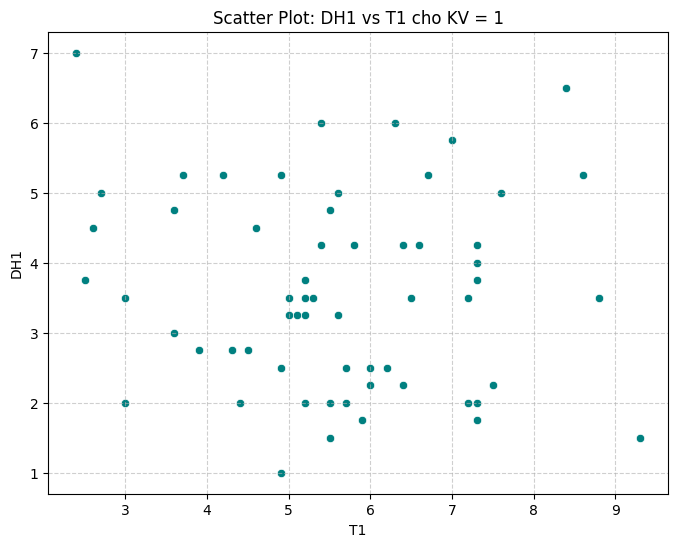

KV: 2 (Count = 19) - Covariance: 0.160, Correlation: 0.062


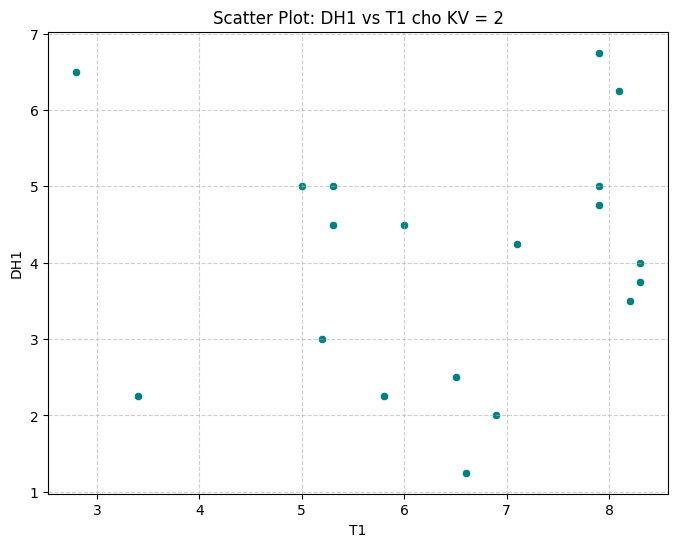

KV: 2NT (Count = 21) - Covariance: 0.512, Correlation: 0.278


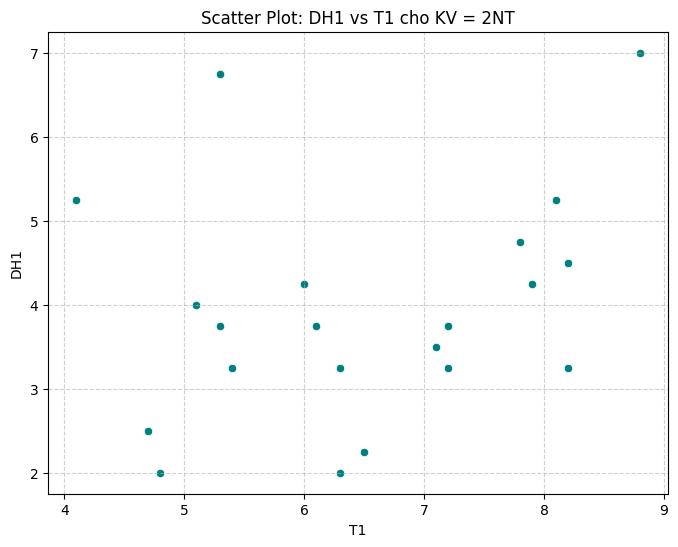

In [59]:
for kv in sorted(df['KV'].unique()):
    subset = df[df['KV'] == kv]
    cov = subset['DH1'].cov(subset['T1'])
    corr = subset['DH1'].corr(subset['T1'])
    print(f"KV: {kv} (Count = {len(subset)}) - Covariance: {cov:.3f}, Correlation: {corr:.3f}")
    
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=subset, x='T1', y='DH1', color='teal')
    plt.title(f"Scatter Plot: DH1 vs T1 cho KV = {kv}")
    plt.xlabel("T1")
    plt.ylabel("DH1")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()


Ma trận hiệp phương sai:
          DH1       DH2       DH3
DH1  2.028939  0.053081  0.027778
DH2  0.053081  1.123712 -0.101010
DH3  0.027778 -0.101010  1.083965

Ma trận tương quan:
          DH1       DH2       DH3
DH1  1.000000  0.035154  0.018731
DH2  0.035154  1.000000 -0.091523
DH3  0.018731 -0.091523  1.000000


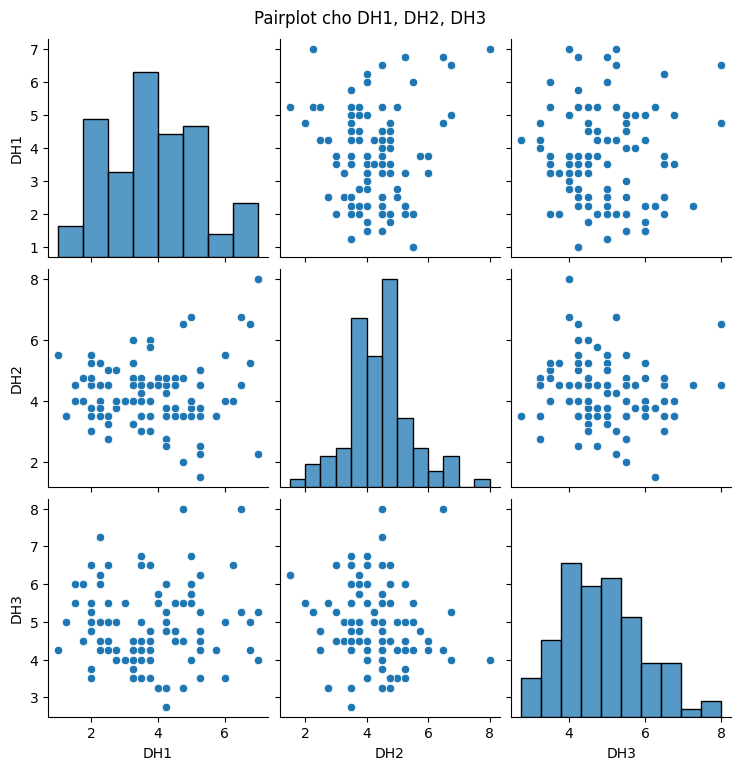

In [60]:

vars_DH = ['DH1', 'DH2', 'DH3']

cov_matrix = df[vars_DH].cov()
print("Ma trận hiệp phương sai:")
print(cov_matrix)

corr_matrix = df[vars_DH].corr()
print("\nMa trận tương quan:")
print(corr_matrix)

sns.pairplot(df[vars_DH])
plt.suptitle("Pairplot cho DH1, DH2, DH3", y=1.02)
plt.show()